(20pts) Write a function [p, x] = mykde(X,h) that performs kernel density estimation on data X with bandwidth h. It should return the estimated density p(x) and its domain x where you estimated the p(x) for X in 1-D and 2-D.

Generate N = 1000 Gaussian random data with µ1 = 5 and σ1 = 1. Test your function mykde on this data with h = {0.1,1,5,10}. In your report, report the histogram of X along with the ﬁgures of estimated densities. • Generate N = 1000 1-D Gaussian random data with µ1 = 5 and σ1 = 1 and another Gaussian random data with µ2 = 0 and σ2 = 0.2. Test your function mykde on this data with h = {0.1,1,5,10}. In your report, report the histogram of X along with the ﬁgures of estimated densities.

In [4]:
def kde_pdf(data, kernel_func, bandwidth):
    """Generate kernel density estimator over data."""
    kernels = dict()
    n = len(data)
    for d in data:
        kernels[d] = kernel_func(d, bandwidth)
    def evaluate(x):
        """Evaluate `x` using kernels above."""
        pdfs = list()
        for d in data: pdfs.append(kernels[d](x))
        return(sum(pdfs)/n)
    return(evaluate)



def kde_cdf(data, kernel_func, bandwidth):
    """Generate kernel distribution estimator over data."""
    kernels = dict()
    n = len(data)
    for d in data:
        kernels[d] = kernel_func(d, bandwidth)

    def evaluate(x):
        """Evaluate x using kernels above."""
        cdfs = list()
        for d in data: cdfs.append(kernels[d](x))
        return (sum(cdfs)/n)
    return(evaluate)


TypeError: kde_pdf() got an unexpected keyword argument 'b'

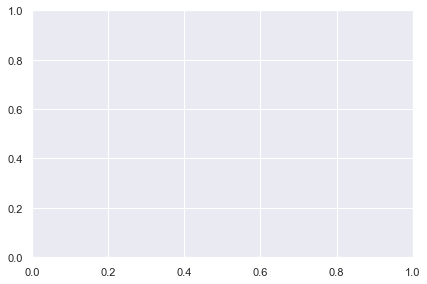

In [5]:



%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (15,10)


vals  = [5, 12, 15, 20]
avals = np.array(vals)
xvals = np.arange(min(vals), max(vals), .01)

fig = plt.figure()

# bandwidth=1:
ax1 = fig.add_subplot(2, 2, 1)
dist_1 = kde_pdf(data=vals, kernel_func=uniform_pdf, b=1)
y1 = [dist_1(i) for i in xvals]
ys1 = [dist_1(i) for i in vals]
ax1.scatter(vals, ys1)
ax1.plot(xvals, y1)


# bandwidth=2:
ax2 = fig.add_subplot(2, 2, 2)
dist_2 = kde_pdf(data=vals, kernel_func=uniform_pdf, bandwidth=2)
y2 = [dist_2(i) for i in xvals]
ys2 = [dist_2(i) for i in vals]
ax2.scatter(vals, ys2)
ax2.plot(xvals, y2)

# bandwidth=3:
ax3 = fig.add_subplot(2, 2, 3)
dist_3 = kde_pdf(vals, kernel_func=uniform_pdf, bandwidth=3)
y3 = [dist_3(i) for i in xvals]
ys3 = [dist_3(i) for i in vals]
ax3.scatter(vals, ys3)
ax3.plot(xvals, y3)

# bandwidth=4:
ax4 = fig.add_subplot(2, 2, 4)
dist_4 = kde_pdf(vals, kernel_func=uniform_pdf, bandwidth=4)
y4     = [dist_4(i) for i in xvals]
ys4    = [dist_4(i) for i in vals]
ax4.scatter(vals, ys4)
ax4.plot(xvals, y4)


# display gridlines 
g1 = ax1.grid(True)
g2 = ax2.grid(True)
g3 = ax3.grid(True)
g4 = ax4.grid(True)

# set title
t1=ax1.set_title(r"Uniform Kernel")
t2=ax2.set_title(r"Uniform Kernel")
t3=ax3.set_title(r"Uniform Kernel")
t4=ax4.set_title(r"Uniform Kernel")


# display legend in each subplot
leg1 = mpatches.Patch(color=None, label='bandwidth=1')
leg2 = mpatches.Patch(color=None, label='bandwidth=2')
leg3 = mpatches.Patch(color=None, label='bandwidth=3')
leg4 = mpatches.Patch(color=None, label='bandwidth=4')

ax1.legend(handles=[leg1])
ax2.legend(handles=[leg2])
ax3.legend(handles=[leg3])
ax4.legend(handles=[leg4])

plt.tight_layout()
plt.show()



In [43]:
import numpy as np

In [79]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

NameError: name 'x_d' is not defined

In [44]:

mu, sigma = 5, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [45]:
abs(mu - np.mean(s)) < 0.01

False

In [46]:
abs(sigma - np.std(s, ddof=1)) < 0.01

False

/Users/pavankunchala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


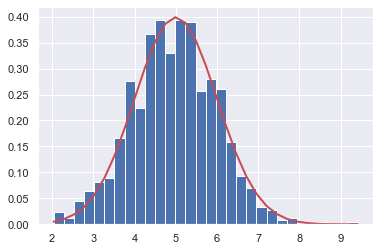

In [47]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
              np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


In [48]:
mu2 , sigma2 = 0 ,0.2
s = np.random.normal(mu2, sigma2, 1000)

In [49]:
abs(mu2 - np.mean(s)) < 0.01

True

In [50]:
abs(sigma2 - np.std(s, ddof=1)) < 0.01

True

/Users/pavankunchala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


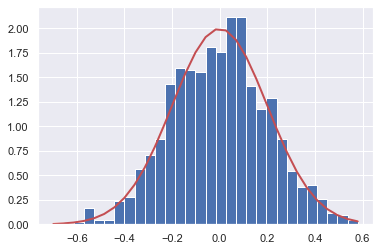

In [51]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
              np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r')
plt.show()



15pts) Generate 2 sets of 2-D Gaussian random data with N1 = 500 and N2 = 500 using the following parameters: µ1 = [1,0], µ2 = [0,2.5], Σ1 =0.9 0.4 0.4 0.9, Σ2 =0.9 0.4 0.4 0.9. (1) Test your function mykde on this data with h = {0.1,1,5,10}. In your report, report ﬁgures of estimated densities.

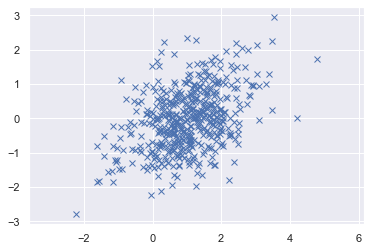

In [53]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mu1, sigma1, 500).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [54]:
mu2 = [0, 2.5]
sigma2 = [[.9, .4], [.4, .9]]  

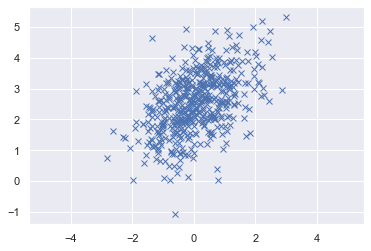

In [55]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mu2, sigma2, 500).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

(Naive Bayes, 65pts) Generate 1000 training instances in two diﬀerent classes (500 in each) from multi-variate normal distribution using the following parameters for each class µ1 = [1,0], µ2 = [0,1], Σ1 = 1 0.75 0.75 1 , Σ2 = 1 0.75 0.75 1  (2) and label them 0 and 1. Then, generate testing data in the same manner with 500 instances for each class, i.e., 1000 in total.

In [56]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [57]:
17
18
19
20
21
22
23
24
25
26
27
28
29
# Example of separating data by class value
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated
 
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)



0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


In [58]:
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

In [59]:
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [60]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

In [61]:
# Example of summarizing a dataset
from math import sqrt

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Test summarizing a dataset
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [62]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [63]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

(15pt) Write a code to plot an ROC curve and calculate Area Under the Curve (AUC) based on the posterior for class 1 (i.e., the conﬁdence measure for class 1 is the posterior). The implementation should be done on your own without using explicit library that lets you draw the curve. Report the ROC curves from the two cases discussed in above (i.e., 1) equal number of samples for each class and 2) unequal number of samples in the training data).

In [64]:
import numpy as np
import matplotlib.pyplot as plt
def pdf(x, std, mean):
    cons = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = cons*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
x = np.linspace(0, 1, num=100)
good_pdf = pdf(x,0.1,0.4)
bad_pdf = pdf(x,0.1,0.6)

In [65]:
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])

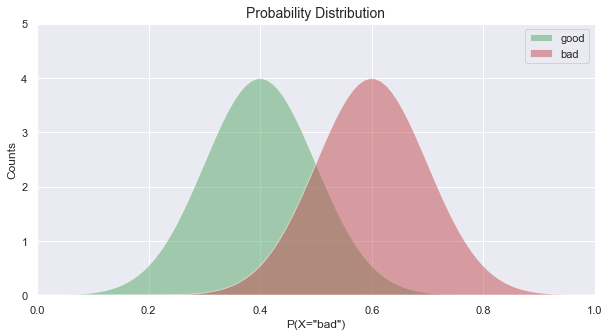

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

In [67]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

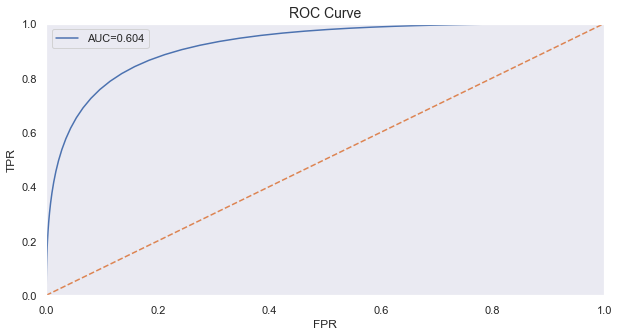

In [68]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(good_pdf, bad_pdf, ax)

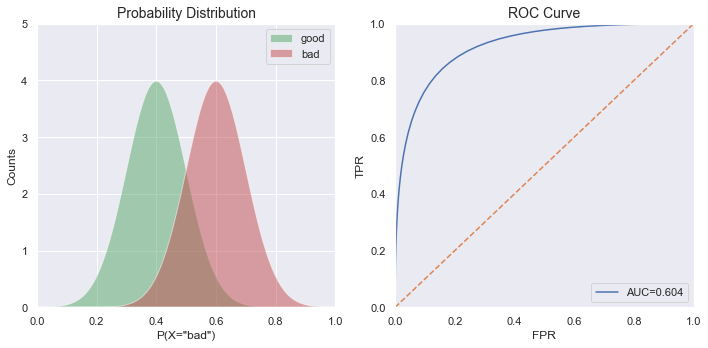

In [69]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax[0])
plot_roc(good_pdf, bad_pdf, ax[1])
plt.tight_layout()

. (20pt) Download Amazon reviews dataset with labels (Dataset: https://www.kaggle.com/noushad24/ amazon-reviews/download). Use tf-idf weight matrix (You’ve done it in HW1) as features and perform 5-fold cross-validation with the Naive Bayes classiﬁer. In your report, report the result (average accuracy, precision and reacall across all folds) and your observation.

In [70]:
import nltk
import numpy as np
import random
import string
import pandas as pd

cod = pd.read_csv('Amazon_Reviews.csv')

 #label column change the values 0 and 1



import bs4 as bs
import urllib.request
import re

raw_html = urllib.request.urlopen('https://www.kaggle.com/noushad24')
raw_html = raw_html.read()

article_html = bs.BeautifulSoup(raw_html, 'lxml')

article_paragraphs = article_html.find_all('p')

article_text = ''

for para in article_paragraphs:
    article_text += para.text

corpus = nltk.sent_tokenize(article_text)

for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)


In [71]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in corpus:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(corpus)/(1 + doc_containing_word))

In [72]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in corpus:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [73]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [74]:
tf_idf_model = np.asarray(tfidf_values)

In [75]:
tf_idf_model = np.transpose(tf_idf_model)